# UFABC - CSM - QS2020 - Minami
# Lab9 - MIDI e IR

# Objetivos
<ol>
  <li> Tocar notas e gerar músicas simples </li>
  <li> Gerar arquivos MIDI </li>
  <li> Reproduzir arquivos MIDI </li>
  <li> Simular a reprodução em salas com Respostas Impulsivas diversas </li>
</ol>



# 1 - Tocar notas e gerar músicas simples
<ul> 
<li> Instalando Magenta </li> 
</ul>


In [1]:
#@test {"output": "ignore"}
print('Installing dependencies...')
!apt-get update -qq && apt-get install -qq libfluidsynth1 fluid-soundfont-gm build-essential libasound2-dev libjack-dev
!pip install -qU pyfluidsynth pretty_midi

!pip install -qU magenta

# Hack to allow python to pick up the newly-installed fluidsynth lib. 
# This is only needed for the hosted Colab environment.
import ctypes.util
orig_ctypes_util_find_library = ctypes.util.find_library
def proxy_find_library(lib):
  if lib == 'fluidsynth':
    return 'libfluidsynth.so.1'
  else:
    return orig_ctypes_util_find_library(lib)
ctypes.util.find_library = proxy_find_library

print('Importing libraries and defining some helper functions...')
from google.colab import files

import magenta
import note_seq


print('🎉 Done!')
print(magenta.__version__)


Installing dependencies...
Importing libraries and defining some helper functions...
🎉 Done!
2.1.3


## Gerando TONS com NoteSequences

Everything in `Magenta` is centered around [NoteSequences](https://github.com/magenta/note-seq/blob/master/note_seq/protobuf/music.proto#L27). This is an abstract representation of a series of notes, each with different pitches, instruments and strike velocities, much like [MIDI](https://en.wikipedia.org/wiki/MIDI).

For example, this is a `NoteSequence` that represents "Twinkle Twinkle Little Star". 

In [2]:
from note_seq.protobuf import music_pb2

twinkle_twinkle = music_pb2.NoteSequence()

# Add the notes to the sequence.
twinkle_twinkle.notes.add(pitch=60, start_time=0.0, end_time=0.5, velocity=80)
twinkle_twinkle.notes.add(pitch=60, start_time=0.5, end_time=1.0, velocity=80)
twinkle_twinkle.notes.add(pitch=67, start_time=1.0, end_time=1.5, velocity=80)
twinkle_twinkle.notes.add(pitch=67, start_time=1.5, end_time=2.0, velocity=80)
twinkle_twinkle.notes.add(pitch=69, start_time=2.0, end_time=2.5, velocity=80)
twinkle_twinkle.notes.add(pitch=69, start_time=2.5, end_time=3.0, velocity=80)
twinkle_twinkle.notes.add(pitch=67, start_time=3.0, end_time=4.0, velocity=80)
twinkle_twinkle.notes.add(pitch=65, start_time=4.0, end_time=4.5, velocity=80)
twinkle_twinkle.notes.add(pitch=65, start_time=4.5, end_time=5.0, velocity=80)
twinkle_twinkle.notes.add(pitch=64, start_time=5.0, end_time=5.5, velocity=80)
twinkle_twinkle.notes.add(pitch=64, start_time=5.5, end_time=6.0, velocity=80)
twinkle_twinkle.notes.add(pitch=62, start_time=6.0, end_time=6.5, velocity=80)
twinkle_twinkle.notes.add(pitch=62, start_time=6.5, end_time=7.0, velocity=80)
twinkle_twinkle.notes.add(pitch=60, start_time=7.0, end_time=8.0, velocity=80) 
twinkle_twinkle.total_time = 8

twinkle_twinkle.tempos.add(qpm=60);

# This is a colab utility method that visualizes a NoteSequence.
note_seq.plot_sequence(twinkle_twinkle)

# This is a colab utility method that plays a NoteSequence.
note_seq.play_sequence(twinkle_twinkle,synth=note_seq.fluidsynth)



Pode variar os tempos e as notas

## Agora com ODE A ALEGRIA

In [3]:
# Ode a Alegria

ode_to_joy = music_pb2.NoteSequence()

bpm = 120

bpm_seg = 60/bpm

# Piano quatro vozes

# Violino

ode_to_joy.notes.add(pitch=71, start_time=(0*bpm_seg), end_time=(1*bpm_seg), velocity=80)
ode_to_joy.notes.add(pitch=71, start_time=(1*bpm_seg), end_time=(2*bpm_seg), velocity=80)
ode_to_joy.notes.add(pitch=72, start_time=(2*bpm_seg), end_time=(3*bpm_seg), velocity=80)
ode_to_joy.notes.add(pitch=74, start_time=(3*bpm_seg), end_time=(4*bpm_seg), velocity=80)

ode_to_joy.notes.add(pitch=74, start_time=(4*bpm_seg), end_time=(5*bpm_seg), velocity=80)
ode_to_joy.notes.add(pitch=72, start_time=(5*bpm_seg), end_time=(6*bpm_seg), velocity=80)
ode_to_joy.notes.add(pitch=71, start_time=(6*bpm_seg), end_time=(7*bpm_seg), velocity=80)
ode_to_joy.notes.add(pitch=69, start_time=(7*bpm_seg), end_time=(8*bpm_seg), velocity=80)

ode_to_joy.notes.add(pitch=67, start_time=8*bpm_seg, end_time=9*bpm_seg, velocity=80)
ode_to_joy.notes.add(pitch=67, start_time=9*bpm_seg, end_time=10*bpm_seg, velocity=80)
ode_to_joy.notes.add(pitch=69, start_time=10*bpm_seg, end_time=11*bpm_seg, velocity=80)
ode_to_joy.notes.add(pitch=71, start_time=11*bpm_seg, end_time=12*bpm_seg, velocity=80)

ode_to_joy.notes.add(pitch=71, start_time=12*bpm_seg, end_time=13.5*bpm_seg, velocity=80)
ode_to_joy.notes.add(pitch=69, start_time=13.5*bpm_seg, end_time=14*bpm_seg, velocity=80) 
ode_to_joy.notes.add(pitch=69, start_time=14*bpm_seg, end_time=16*bpm_seg, velocity=80)


'''
ode_to_joy.notes.add(pitch=72, start_time=15.0*bpm_seg, end_time=15.5*bpm_seg, velocity=80)

ode_to_joy.notes.add(pitch=72, start_time=15.5*bpm_seg, end_time=16.0*bpm_seg, velocity=80)
ode_to_joy.notes.add(pitch=74, start_time=16.0*bpm_seg, end_time=16.5*bpm_seg, velocity=80)
ode_to_joy.notes.add(pitch=76, start_time=16.5*bpm_seg, end_time=17.5*bpm_seg, velocity=80)
ode_to_joy.notes.add(pitch=79, start_time=17.5*bpm_seg, end_time=18.5*bpm_seg, velocity=80)

ode_to_joy.notes.add(pitch=79, start_time=19.0*bpm_seg, end_time=19.5*bpm_seg, velocity=80)
ode_to_joy.notes.add(pitch=77, start_time=19.5*bpm_seg, end_time=20.0*bpm_seg, velocity=80)
ode_to_joy.notes.add(pitch=76, start_time=20.0*bpm_seg, end_time=20.5*bpm_seg, velocity=80)
ode_to_joy.notes.add(pitch=72, start_time=20.5*bpm_seg, end_time=21.5*bpm_seg, velocity=80)
ode_to_joy.notes.add(pitch=77, start_time=21.5*bpm_seg, end_time=22.5*bpm_seg, velocity=80)

ode_to_joy.notes.add(pitch=77, start_time=23.0*bpm_seg, end_time=23.5*bpm_seg, velocity=80)
ode_to_joy.notes.add(pitch=76, start_time=23.5*bpm_seg, end_time=24.0*bpm_seg, velocity=80)
ode_to_joy.notes.add(pitch=74, start_time=24.0*bpm_seg, end_time=24.5*bpm_seg, velocity=80)
ode_to_joy.notes.add(pitch=74, start_time=24.5*bpm_seg, end_time=25.5*bpm_seg, velocity=80) 
ode_to_joy.notes.add(pitch=76, start_time=25.5*bpm_seg, end_time=26.5*bpm_seg, velocity=80)

ode_to_joy.notes.add(pitch=74, start_time=27.0*bpm_seg, end_time=27.5*bpm_seg, velocity=80)
ode_to_joy.notes.add(pitch=74, start_time=27.5*bpm_seg, end_time=28.0*bpm_seg, velocity=80) 
ode_to_joy.notes.add(pitch=72, start_time=28.0*bpm_seg, end_time=28.5*bpm_seg, velocity=80)  
ode_to_joy.notes.add(pitch=72, start_time=28.5*bpm_seg, end_time=30.0*bpm_seg, velocity=80) 
'''

ode_to_joy.total_time = 30.0

ode_to_joy.tempos.add(qpm=60);

# This is a colab utility method that visualizes a NoteSequence.
note_seq.plot_sequence(ode_to_joy)

# This is a colab utility method that plays a NoteSequence.
note_seq.play_sequence(ode_to_joy,synth=note_seq.fluidsynth)



Pode usar outro instrumento. Por exemple, uma bateria 

In [4]:
drums = music_pb2.NoteSequence()

drums.notes.add(pitch=36, start_time=0, end_time=0.125, is_drum=True, instrument=10, velocity=80)
drums.notes.add(pitch=38, start_time=0, end_time=0.125, is_drum=True, instrument=10, velocity=80)
drums.notes.add(pitch=42, start_time=0, end_time=0.125, is_drum=True, instrument=10, velocity=80)
drums.notes.add(pitch=46, start_time=0, end_time=0.125, is_drum=True, instrument=10, velocity=80)
drums.notes.add(pitch=42, start_time=0.25, end_time=0.375, is_drum=True, instrument=10, velocity=80)
drums.notes.add(pitch=42, start_time=0.375, end_time=0.5, is_drum=True, instrument=10, velocity=80)
drums.notes.add(pitch=42, start_time=0.5, end_time=0.625, is_drum=True, instrument=10, velocity=80)
drums.notes.add(pitch=50, start_time=0.5, end_time=0.625, is_drum=True, instrument=10, velocity=80)
drums.notes.add(pitch=36, start_time=0.75, end_time=0.875, is_drum=True, instrument=10, velocity=80)
drums.notes.add(pitch=38, start_time=0.75, end_time=0.875, is_drum=True, instrument=10, velocity=80)
drums.notes.add(pitch=42, start_time=0.75, end_time=0.875, is_drum=True, instrument=10, velocity=80)
drums.notes.add(pitch=45, start_time=0.75, end_time=0.875, is_drum=True, instrument=10, velocity=80)
drums.notes.add(pitch=36, start_time=1, end_time=1.125, is_drum=True, instrument=10, velocity=80)
drums.notes.add(pitch=42, start_time=1, end_time=1.125, is_drum=True, instrument=10, velocity=80)
drums.notes.add(pitch=46, start_time=1, end_time=1.125, is_drum=True, instrument=10, velocity=80)
drums.notes.add(pitch=42, start_time=1.25, end_time=1.375, is_drum=True, instrument=10, velocity=80)
drums.notes.add(pitch=48, start_time=1.25, end_time=1.375, is_drum=True, instrument=10, velocity=80)
drums.notes.add(pitch=50, start_time=1.25, end_time=1.375, is_drum=True, instrument=10, velocity=80)
drums.total_time = 1.375

drums.tempos.add(qpm=60)

# This is a colab utility method that visualizes a NoteSequence.
note_seq.plot_sequence(drums)


# This is a colab utility method that plays a NoteSequence.
note_seq.play_sequence(drums,synth=note_seq.fluidsynth)

# * Agora "Escreva" uma música simples, e toque-a

# 2. Gerando arquivos MIDI: `NoteSequence` ->  MIDI

When you called the "play_sequence" method above, this converted the `NoteSequence` to MIDI, and created an HTML widget to play it. This method is specially made for colab notebooks, so it won't work inside your Python script. That method uses the Magenta built-in [conversion methods](https://github.com/magenta/note-seq/blob/master/note_seq/midi_io.py#L51), which you can use in your python script:

In [5]:
# This creates a file called `asa_branca_sample_output.mid`, containing the drums solo we've been using.
note_seq.sequence_proto_to_midi_file(ode_to_joy, 'ode_to_joy_sample_output.mid')

# This is a colab utility method to download that file. In your Python script, you 
# would just write it to disk.
files.download('ode_to_joy_sample_output.mid')

'''
# This creates a file called `drums_sample_output.mid`, containing the drums solo we've been using.
note_seq.sequence_proto_to_midi_file(drums, 'drums_sample_output.mid')

# This is a colab utility method to download that file. In your Python script, you 
# would just write it to disk.
files.download('drums_sample_output.mid')
'''

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

"\n# This creates a file called `drums_sample_output.mid`, containing the drums solo we've been using.\nnote_seq.sequence_proto_to_midi_file(drums, 'drums_sample_output.mid')\n\n# This is a colab utility method to download that file. In your Python script, you \n# would just write it to disk.\nfiles.download('drums_sample_output.mid')\n"

# * Salve a sua "composição" musical

## Useful helpers
There are a lot of other helper methods sprinkled around the `note_seq` codebase that you might need but not know where to find. Here are some of our favourites:

- [converting](https://github.com/magenta/note-seq/blob/master/note_seq/midi_io.py) between MIDI and NoteSequences
- [trimming, concatenating and expanding](https://github.com/magenta/note-seq/blob/master/note_seq/sequences_lib.py) NoteSequences
- [colab notebook](https://github.com/magenta/note-seq/blob/master/note_seq/notebook_utils.py) utils

# 3. Reproduzindo Arquivos MIDI

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Carregando MIDI

In [8]:
midi_file = note_seq.midi_file_to_note_sequence('/content/drive/My Drive/Colab Notebooks/Labs Multimidia/Lab9/Gabriel/ode_to_joy_sample_output.mid')
# Handle sustain pedal in midi_file
midi_file = note_seq.apply_sustain_control_changes(midi_file)
note_seq.play_sequence(
    midi_file,
    synth=note_seq.fluidsynth, sample_rate=22050)
note_seq.plot_sequence(midi_file)

# 4. Tocando a música em alguns ambientes

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import librosa
import librosa.display
import IPython.display

In [10]:
# Resposta Impulsiva de uma capela de Igreja
ir_chapel, sr_chapel = librosa.load('/content/drive/My Drive/Colab Notebooks/Labs Multimidia/Lab9/stalbans_omni.wav', mono = True, sr = 96000)

In [11]:
# Normalização da IR
ir_chapel = librosa.util.normalize(ir_chapel)

In [12]:
IPython.display.Audio(ir_chapel, rate = sr_chapel)

Text(0.5, 1.0, 'IR de uma capela')

<Figure size 432x288 with 0 Axes>

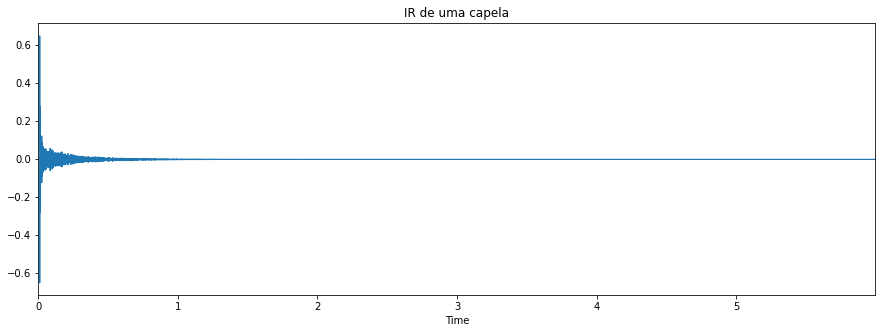

In [13]:
plt.figure()
fig, ax = plt.subplots(figsize=(15, 5))
librosa.display.waveplot(ir_chapel, sr=sr_chapel)
plt.title('IR de uma capela')

#### "Tocando" Beethoven na Capela

In [14]:
Ode, sr_Ode = librosa.load('/content/drive/My Drive/Colab Notebooks/Labs Multimidia/Lab9/Gabriel/ode_to_joy.wav', mono = True, sr = 352800)

In [15]:
Ode = librosa.util.normalize(Ode)

In [ ]:
reproducao_Beethoven_chapel = np.convolve(Ode, ir_chapel, mode = 'full')


In [ ]:
IPython.display.Audio(reproducao_Beethoven_chapel, rate = sr_Ode)

In [ ]:
# "Tocando" numa Sala de Concertos
ir_hall, sr_hall = librosa.load('/content/drive/My Drive/Colab Notebooks/Labs Multimidia/Lab9/usina_main_s1_p5.wav', mono = True, sr = 48000)
ir_hall = librosa.util.normalize(ir_hall)
plt.figure()
fig, ax = plt.subplots(figsize=(15, 5))
librosa.display.waveplot(ir_hall, sr=sr_hall)
plt.title('IR de uma Sala de Concertos')

In [ ]:
IPython.display.Audio(ir_hall, rate = sr_hall)

In [ ]:
reproducao_Beethoven_hall = np.convolve(Ode, ir_hall, mode = 'full')
IPython.display.Audio(reproducao_Beethoven_hall, rate = sr_Ode)


## * Reproduza a sua música neste dois ambientes diferentes

# 5. Relatório
### a) Apresentem as músicas de todos os integrantes do grupo, identificando quem "criou" cada uma;
### b) Pesquise numa base de dados aberta como: https://www.openair.hosted.york.ac.uk/?page_id=36, e encontre três IRs de ambientes diferentes (pequeno-fechado, auditório médio, igreja grande);
### c) "Criar" mais uma música (de maior duração) e "reproduzi-la" em cada ambiente, comentando as diferenças;
### d) Repita o mesmo procedimento (c) para um outro .midi que desejar (da web).
# -X-X-X-